# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [2]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [32]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"de Mulder, Mr. Theodore",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [33]:
tnull =  titanic.isnull() 
# True represents corresponding null value

#Cabin  null counter 
cabin = tnull.iloc[:,5]
null_count1 = sum(cabin)
print("Cabin missing records:" , null_count1)

# age null counter 
age = tnull.iloc[:,10]
null_count2 = sum(age)
print("age missing records:", null_count2)

# Embarked null counter 
embarked = tnull.iloc[:,11]
null_count3 = sum(embarked)
print("Embarked missing records:", null_count3)


Cabin missing records: 177
age missing records: 687
Embarked missing records: 2


### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [34]:
# modify data   (error)
age_mean = titanic.iloc[:,5].mean()
other = ("other")
embarked_mode = titanic.iloc[:,11].mode()


titanic.iloc[:,5].fillna(age_mean, inplace =True)
titanic.iloc[:,10].fillna("other", inplace = True)
titanic.iloc[:,11].fillna(embarked_mode, inplace = True)

titanic
#titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,other,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,other,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,other,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,other,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,other,C


### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [35]:
# get fares
Fares_sorted = titanic.iloc[:,9].sort_values(ascending = False)

Fares_sorted.iloc[15]
names = titanic.iloc[:,3]

df1 = pd.concat([Fares_sorted, names], axis =1)
df1 = df1.sort_values(by=['Fare'], ascending= False)
print(df1.iloc[15,1])


Farthing, Mr. John


In [27]:
### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [60]:
# 6th most expensive female ticket
Living_female_fares = titanic.copy(deep = True)

#find men , find non survivers
no_men = Living_female_fares['Sex'] == 'female'
no_dead = Living_female_fares['Survived'] == 1
#print(no_men)

#men be gone , non survivers be gone
Living_female_fares = Living_female_fares[no_men]
Living_female_fares = Living_female_fares[no_dead]
#print(Living_female_fares)

Living_female_fares = Living_female_fares.sort_values(by=['Fare'], ascending= False)
print(Living_female_fares.iloc[5,3])


Baxter, Mrs. James (Helene DeLaudeniere Chaput)


C:\Users\kwame\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [61]:
# IDK if this is right
titanic.pivot_table(values= 'Survived', index = 'Pclass', columns = 'Sex', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

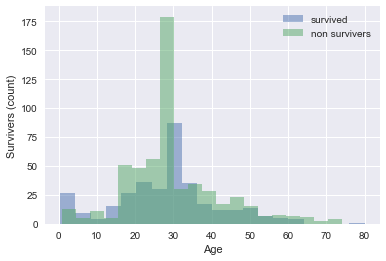

In [69]:
dead = titanic['Survived'] == 0

# histogram for comparison 
ageC = titanic[no_dead]
ageD = titanic[dead]

plt.hist(ageC.iloc[:,5],20,alpha = .5)
plt.hist(ageD.iloc[:,5],20,alpha = .5)


plt.ylabel('Survivers (count)')
plt.xlabel('Age')
plt.legend(['survived', 'non survivers'])
plt.show()

In [ ]:
## Older indivals were less lickely to survive across most age ranges. Visualization my not be accurate because missing age values were imputed at age 29.69 .

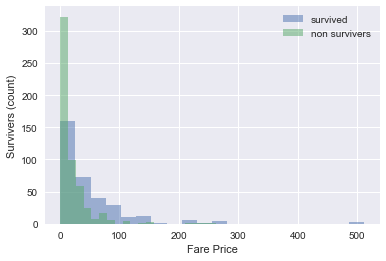

In [70]:
plt.hist(ageC.iloc[:,9],20,alpha = .5)
plt.hist(ageD.iloc[:,9],20,alpha = .5)


plt.ylabel('Survivers (count)')
plt.xlabel('Fare Price')
plt.legend(['survived', 'non survivers'])
plt.show()

In [ ]:
### People who paid  a hire fare price had a better chnace at survival accross all price ranges.

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [80]:
# Calculate survival rate matrix
titanic.pivot_table(values= 'Survived', index = 'SibSp', columns = 'Parch' , aggfunc='mean')


Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,0.303538,0.657895,0.724138,1.000000,0.0,0.000000,NaN
1,0.520325,0.596491,0.631579,0.333333,0.0,0.333333,0.0
2,0.250000,0.857143,0.500000,1.000000,NaN,NaN,NaN
3,1.000000,0.000000,0.285714,NaN,NaN,NaN,NaN
4,NaN,0.000000,0.333333,NaN,NaN,NaN,NaN
5,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
8,NaN,NaN,0.000000,NaN,NaN,NaN,NaN


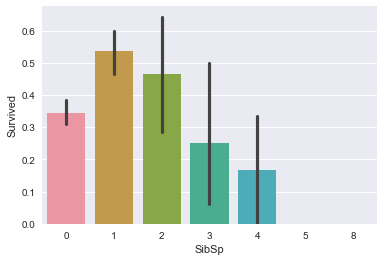

In [83]:
# seaborn bar plot siblings count
ax = sns.barplot(x="SibSp", y="Survived", data=titanic)

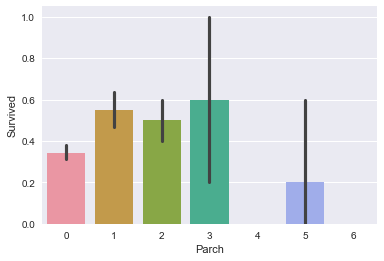

In [84]:
# seaborn bar plot parents count
ax2 = sns.barplot(x="Parch", y="Survived", data=titanic)

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

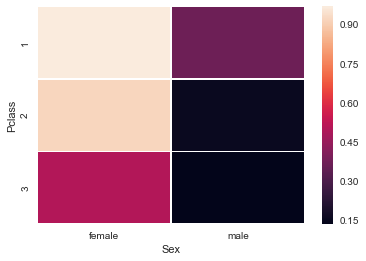

In [108]:
#heat map
hMap = titanic.pivot_table(values = 'Survived', index = 'Pclass', columns = 'Sex' , aggfunc='mean')
ax3 = sns.heatmap(hMap, linewidths = .5)

In [101]:
# The heat map shows a high correlation for survival for 1st class female passengers as this group has very high survival rate.
# On the other end of the spectrum 3rd class male passengers have a very low survival rate as indicated bby the heat map.

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

Embarked         C        Q         S
Survived  0.553571  0.38961  0.336957


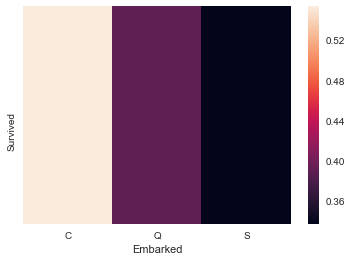

In [112]:

# Final insights
hMap2 = titanic.pivot_table(values = 'Survived', columns = 'Embarked' , aggfunc='mean')
print(hMap2)
ax4 = sns.heatmap(hMap2)


In [ ]:
# The survival rate for passengers embarking from Cherbourg have a much higher survial rate then passengers from Queenstown and Southampton.
# Perhaps Cherbourg is a more afluent area and the the passengers from that area were able to purchase more 1st tickets as a result.(passengers with 1st class tickets have a higher survival rate then the rest)

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [0]:
# TODO